In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the folder containing CSV files
folder_path = "C:/Users/Guna/Downloads/CREMP_CSV_files"

# List all CSV files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load the datasets
def load_csv(file_name):
    file_path = os.path.join(folder_path, file_name)
    try:
        return pd.read_csv(file_path)
    except Exception as e:
        print(f"⚠️ Failed to read {file_name}: {e}")
        return None

# Load all files
cremp_octo_raw = load_csv("CREMP_OCTO_RawData_2023.csv")
cremp_octo_summaries_density = load_csv("CREMP_OCTO_Summaries_2023_Density.csv")
cremp_octo_summaries_meanheight = load_csv("CREMP_OCTO_Summaries_2023_MeanHeight.csv")
cremp_pcover_stonycorals = load_csv("CREMP_Pcover_2023_StonyCoralSpecies.csv")
cremp_pcover_taxagroups = load_csv("CREMP_Pcover_2023_TaxaGroups.csv")
cremp_scor_rawdata = load_csv("CREMP_SCOR_RawData_2023.csv")
cremp_scor_summaries_conditioncounts = load_csv("CREMP_SCOR_Summaries_2023_ConditionCounts.csv")
cremp_scor_summaries_counts = load_csv("CREMP_SCOR_Summaries_2023_Counts.csv")
cremp_scor_summaries_density = load_csv("CREMP_SCOR_Summaries_2023_Density.csv")
cremp_scor_summaries_lta = load_csv("CREMP_SCOR_Summaries_2023_LTA.csv")
cremp_stations = load_csv("CREMP_Stations_2023.csv")
cremp_temperatures = load_csv("CREMP_Temperatures_2023.csv")

# 📘 Explanation:
# In this code, we load various CSV files containing coral reef monitoring data from the CREMP dataset into pandas DataFrames.
# Each file corresponds to a specific type of data, such as octocoral measurements, stony coral species, SCOR data, and environmental conditions.
# The function `load_csv()` is used to read each file, with error handling to print a message if any file fails to load.
# This data will be used for further analysis and visualization to assess coral reef health, species composition, and environmental factors 🌊📊.


C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2421223566.py:13: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2421223566.py:13: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2421223566.py:13: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2421223566.py:13: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2421223566.py:13: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129720 (\N{CORAL}) missing fr

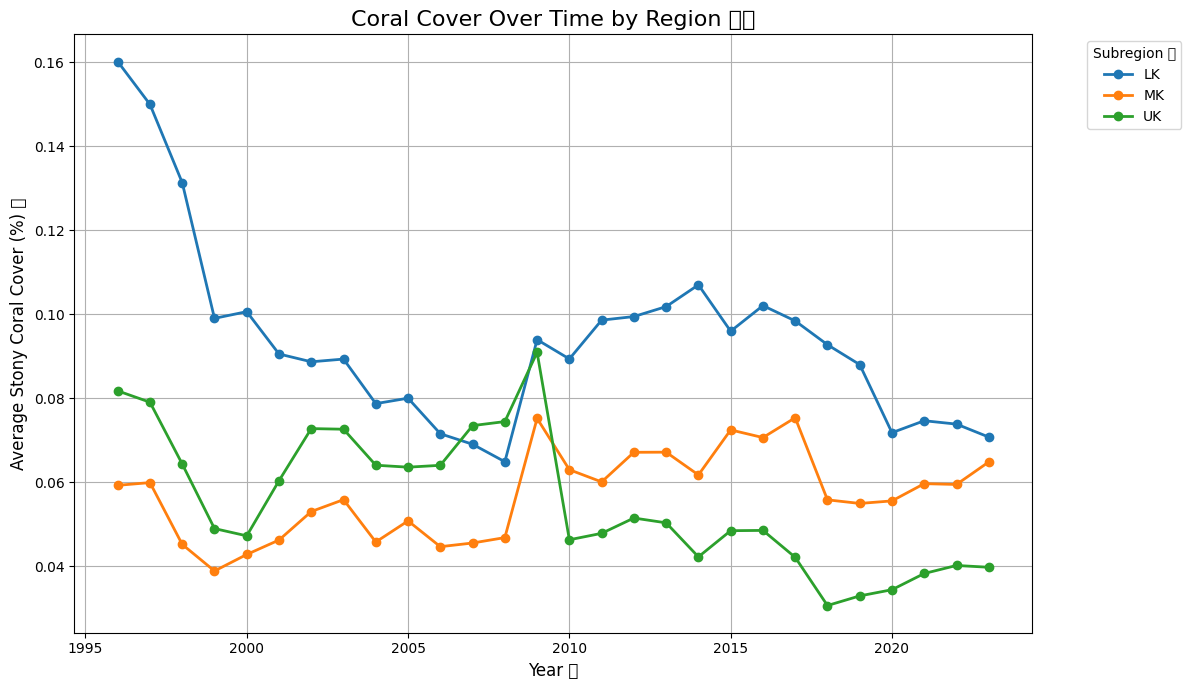

In [2]:
df_line = cremp_pcover_taxagroups.groupby(['Year', 'Subregion'])['Stony_coral'].mean().reset_index()

plt.figure(figsize=(12, 7))
for region in df_line['Subregion'].unique():
    subset = df_line[df_line['Subregion'] == region]
    plt.plot(subset['Year'], subset['Stony_coral'], label=region, marker='o', linewidth=2)

plt.title('Coral Cover Over Time by Region 🌊📉', fontsize=16)
plt.xlabel('Year 🗓️', fontsize=12)
plt.ylabel('Average Stony Coral Cover (%) 🪸', fontsize=12)
plt.legend(title='Subregion 🏝️', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This line plot shows the average stony coral cover over time for different subregions.
# Each line represents a subregion, with points plotted for each year. The plot allows us to compare coral cover trends across subregions.
# The plot helps in identifying regional differences in coral cover changes, providing insights into localized shifts in coral health 🌊🪸📉.


C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3432599192.py:13: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3432599192.py:13: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3432599192.py:13: UserWarning: Glyph 128026 (\N{SPIRAL SHELL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3432599192.py:13: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserW

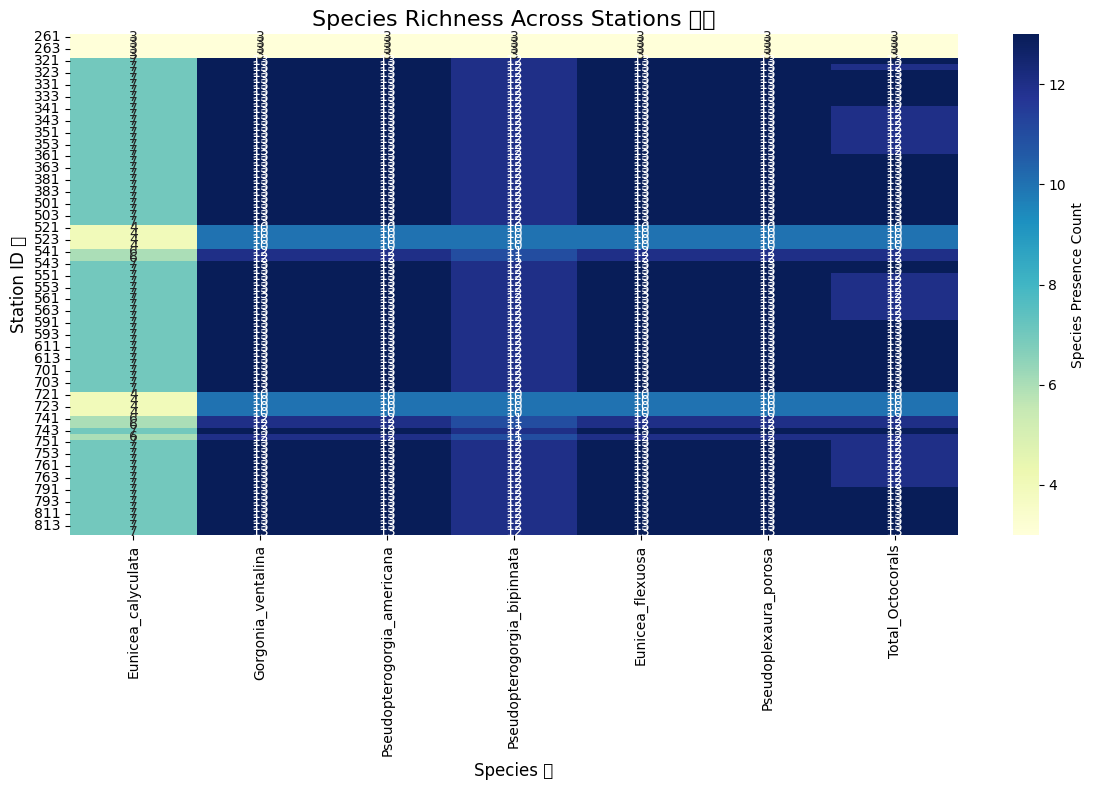

In [3]:
species_columns = ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana', 
                   'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa', 'Total_Octocorals']

df_species = cremp_octo_summaries_density[species_columns].notna().astype(int)
df_species['StationID'] = cremp_octo_summaries_density['StationID']
df_species = df_species.groupby('StationID').sum()

plt.figure(figsize=(12, 8))
sns.heatmap(df_species, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Species Presence Count'})
plt.title('Species Richness Across Stations 🐚🌿', fontsize=16)
plt.xlabel('Species 🧬', fontsize=12)
plt.ylabel('Station ID 🏝️', fontsize=12)
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This heatmap visualizes species richness across different stations by displaying the presence (1) or absence (0) of specific octocoral species.
# Each row represents a station, while the columns represent species. The intensity of the color indicates the count of species present at each station.
# The plot helps in identifying stations with higher species richness, aiding in the understanding of biodiversity distribution across locations 🧬🐚🌿.


C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1432530783.py:13: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1432530783.py:13: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1432530783.py:13: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\

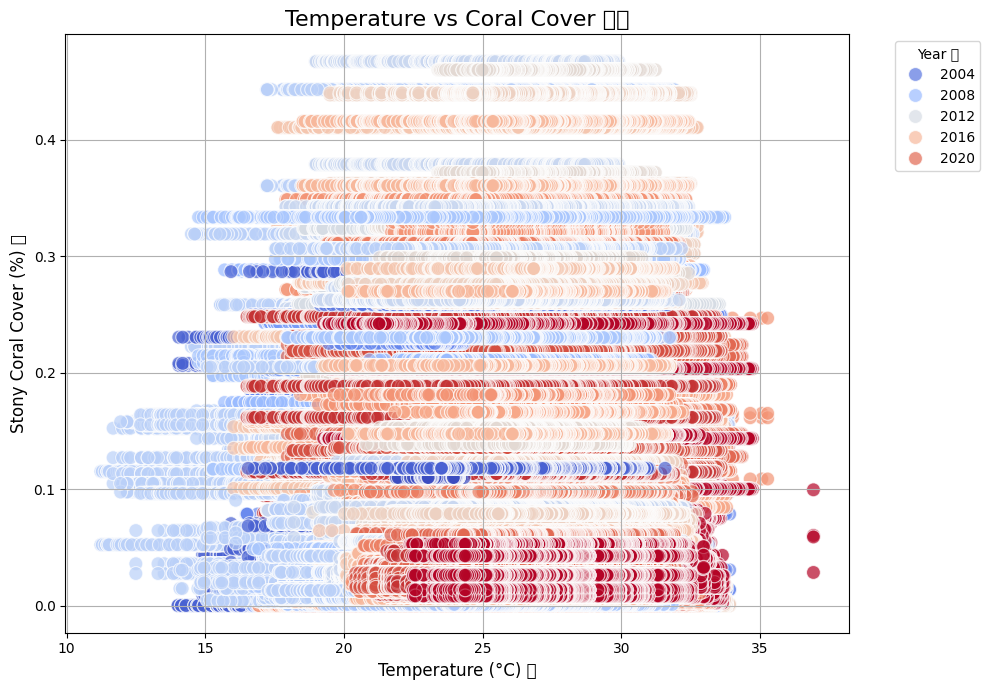

In [4]:
df_temp = cremp_temperatures[['Year', 'SiteID', 'TempC']]
df_coral_cover = cremp_pcover_taxagroups[['Year', 'SiteID', 'Stony_coral']]
df_scatter = pd.merge(df_temp, df_coral_cover, on=['Year', 'SiteID'])

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_scatter, x='TempC', y='Stony_coral', hue='Year', palette='coolwarm', s=100, alpha=0.7)

plt.title('Temperature vs Coral Cover 🌡️🪸', fontsize=16)
plt.xlabel('Temperature (°C) 🌡️', fontsize=12)
plt.ylabel('Stony Coral Cover (%) 🪸', fontsize=12)
plt.legend(title='Year 🗓️', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This scatter plot visualizes the relationship between temperature (°C) and stony coral cover (%) for each site across different years.
# Each point represents a specific site's temperature and coral cover for a given year, with the color of the points corresponding to the year.
# The plot helps in understanding how temperature fluctuations might affect coral cover, highlighting potential temperature-stress impacts 🪸🌡️.

C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3573880485.py:15: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3573880485.py:15: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3573880485.py:15: UserWarning: Glyph 127752 (\N{RAINBOW}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3573880485.py:15: UserWarning: Glyph 128032 (\N{TROPICAL FISH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\3573880485.py:15: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from

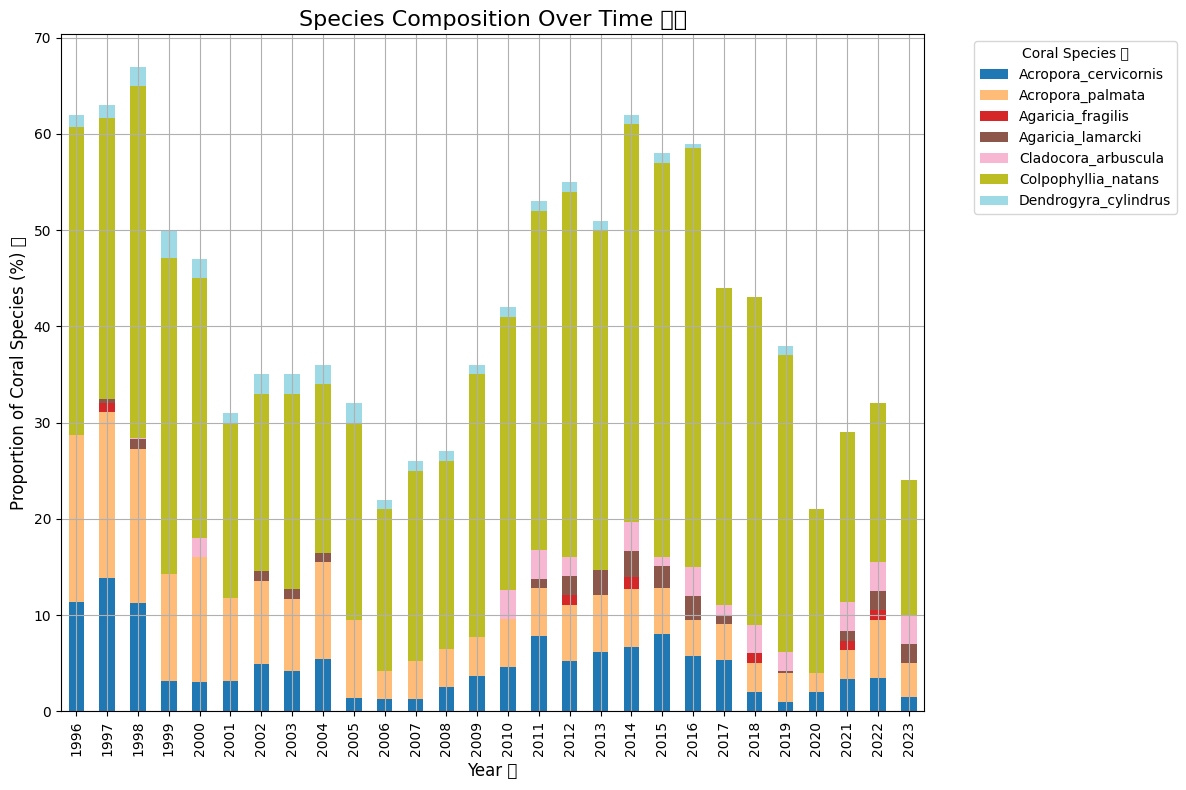

In [5]:
species_columns = ['Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis', 
                   'Agaricia_lamarcki', 'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus']

df_species_composition = cremp_pcover_stonycorals[species_columns]
df_species_composition = df_species_composition.div(df_species_composition.sum(axis=1), axis=0)
df_species_composition['Year'] = cremp_pcover_stonycorals['Year']
df_stacked = df_species_composition.groupby('Year').sum()

df_stacked.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Species Composition Over Time 🌈🐠', fontsize=16)
plt.xlabel('Year 🗓️', fontsize=12)
plt.ylabel('Proportion of Coral Species (%) 🧬', fontsize=12)
plt.legend(title='Coral Species 🪸', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This stacked bar plot visualizes the proportional composition of various coral species over time.
# Each bar represents a year, and the segments within each bar show the relative abundance of different coral species.
# The plot allows us to observe changes in species composition across years, helping identify trends in coral community structure 🌈🐠.


C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1249195141.py:16: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1249195141.py:16: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1249195141.py:16: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1249195141.py:16: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\1249195141.py:16: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128208 (\N{TRIANGULAR RU

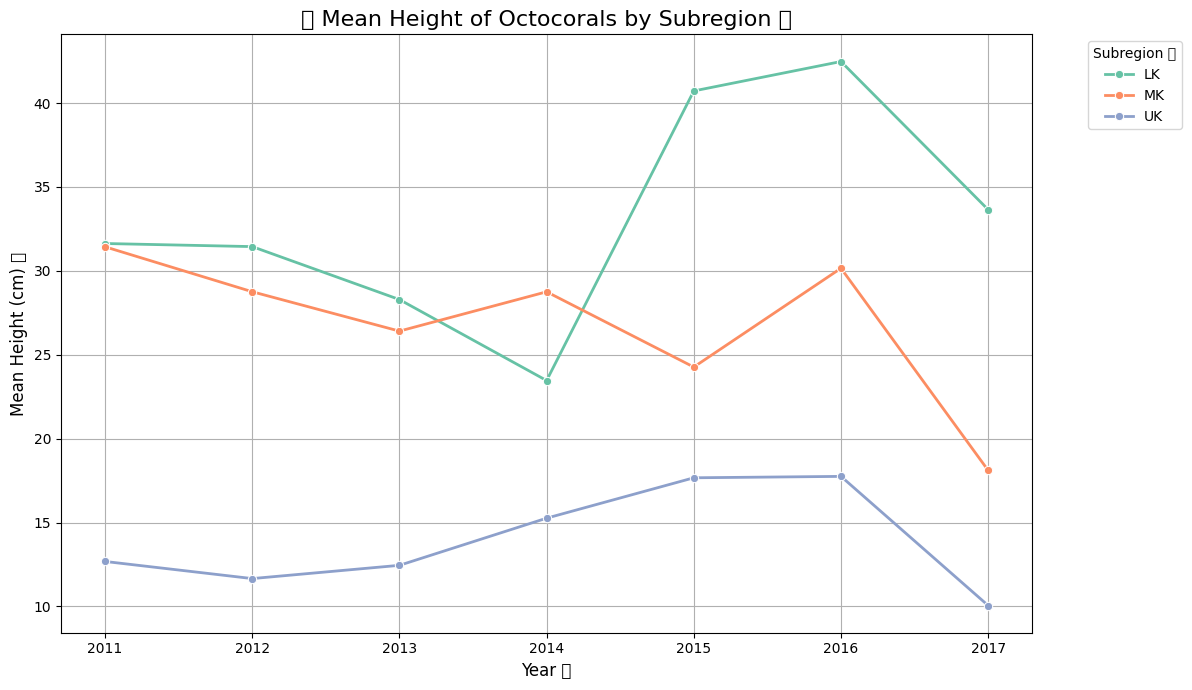

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by year and subregion, calculating the mean height for a representative species
df_mean_height = cremp_octo_summaries_meanheight.groupby(['Year', 'subRegionID'])['Eunicea_calyculata'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_mean_height, x='Year', y='Eunicea_calyculata', hue='subRegionID', marker='o', palette='Set2', linewidth=2)

plt.title('📏 Mean Height of Octocorals by Subregion 🌿', fontsize=16)
plt.xlabel('Year 🗓️', fontsize=12)
plt.ylabel('Mean Height (cm) 📐', fontsize=12)
plt.legend(title='Subregion 🌍', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This line plot shows the mean height of the octocoral species Eunicea calyculata across different years and subregions.
# The plot allows us to observe how the height of this species changes over time, with different lines representing different subregions.
# The markers on the lines help to emphasize data points for each year, making trends easier to follow.
# This visualization is useful for analyzing spatial differences in growth patterns of octocorals 🌿📏.

C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2569985390.py:16: UserWarning: Glyph 127965 (\N{DESERT ISLAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2569985390.py:16: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\2569985390.py:16: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\s

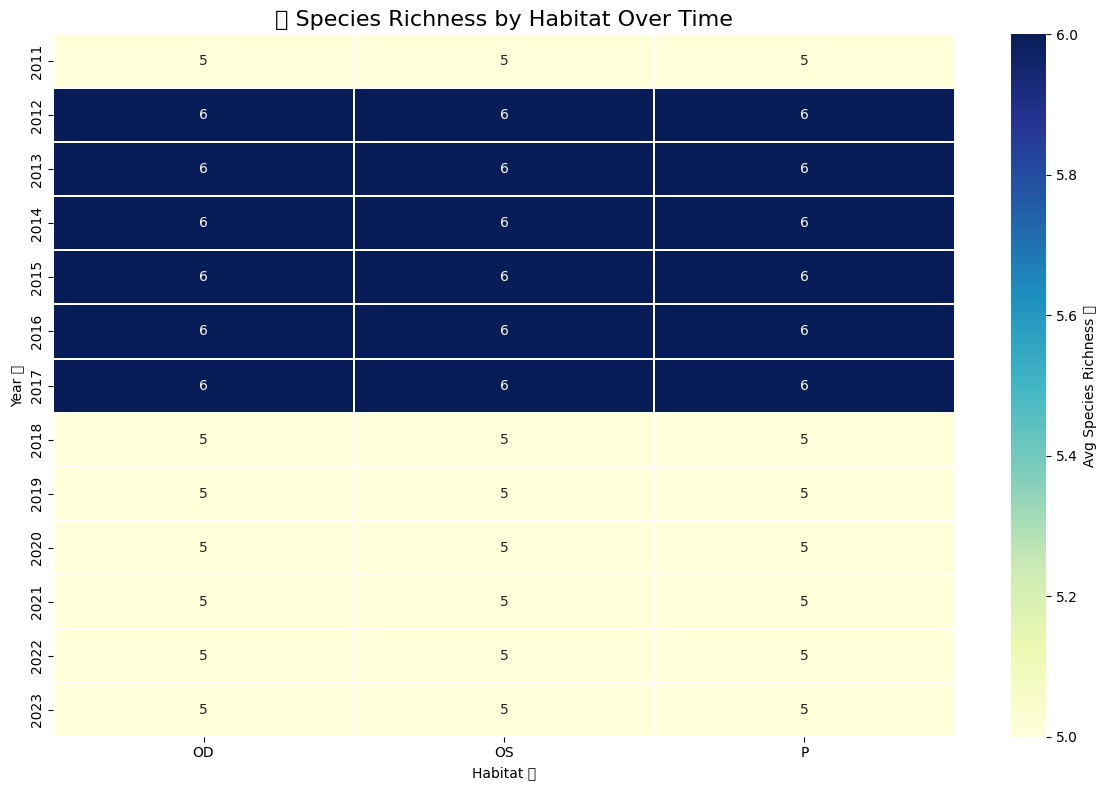

In [8]:
# Prepare species richness heatmap across Habitat and Year
df_species_richness = cremp_octo_summaries_density.copy()
df_species_richness['Species_Richness'] = df_species_richness[
    ['Eunicea_calyculata', 'Gorgonia_ventalina', 'Pseudopterogorgia_americana',
     'Pseudopterogorgia_bipinnata', 'Eunicea_flexuosa', 'Pseudoplexaura_porosa']
].notna().sum(axis=1)

richness_by_habitat = df_species_richness.groupby(['Year', 'Habitat'])['Species_Richness'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(richness_by_habitat, annot=True, cmap='YlGnBu', linewidths=0.3, cbar_kws={'label': 'Avg Species Richness 🧬'})
plt.title('🧬 Species Richness by Habitat Over Time', fontsize=16)
plt.xlabel('Habitat 🏝️')
plt.ylabel('Year 🗓️')
plt.tight_layout()
plt.show()

# 📘 Explanation:
# This heatmap visualizes the average species richness across different habitats and years.
# Each cell represents the average number of species found in a habitat for a particular year, with brighter colors indicating higher richness.
# The heatmap helps track changes in species diversity 🧬 over time across various habitats 🏝️.


C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\318062044.py:24: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\318062044.py:24: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\318062044.py:24: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\318062044.py:24: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Temp\ipykernel_15468\318062044.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Guna\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129720 (\N{CORAL}) missing from font(s) DejaVu Sans.

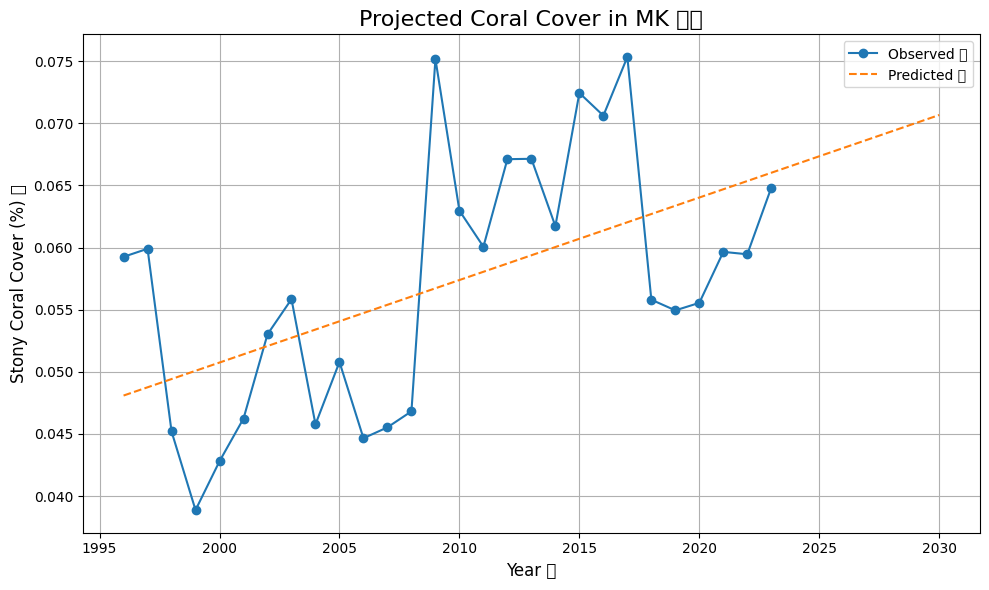

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

df_line = cremp_pcover_taxagroups.groupby(['Year', 'Subregion'])['Stony_coral'].mean().reset_index()
region_name = 'MK'  # example: use 'LK', 'MK', or 'UK'
subset = df_line[df_line['Subregion'] == region_name]

if not subset.empty:
    X = subset[['Year']]
    y = subset['Stony_coral']
    model = LinearRegression()
    model.fit(X, y)
    future_years = pd.DataFrame({'Year': np.arange(subset['Year'].min(), 2031)})
    future_preds = model.predict(future_years)

    plt.figure(figsize=(10, 6))
    plt.plot(subset['Year'], subset['Stony_coral'], 'o-', label='Observed 📊')
    plt.plot(future_years['Year'], future_preds, '--', label='Predicted 🔮')
    plt.title(f'Projected Coral Cover in {region_name} 🌊🔮', fontsize=16)
    plt.xlabel('Year 🗓️', fontsize=12)
    plt.ylabel('Stony Coral Cover (%) 🪸', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ No data found for region: {region_name}")


# 📘 Explanation:
    # This graph uses historical coral cover data from the region 🗺️ and applies a linear regression model 📈
    # to forecast future coral cover trends from 2024 to 2030 🔮. 
    # Blue points show actual observed coral cover 🌱 while the dashed orange line predicts future values based on past trends.
    # This supports your objective of modeling future scenarios to anticipate changes in coral communities 🧠🪸.
